In [1]:
# Multiple Linear Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
# set theme
sns.set()
sns.set(rc={'figure.figsize':(10,8)})

# Multiple Linear Regression

## $ y = b_0 + b_1*x_1 + b_2*x_2 +  . . . . . . + b_n*x_n$

y - __Dependant variables__    
$x_1, x_2 ,  . . .x_n$ - __Independant variables__  

Remember to consider the assumptions to check for linear regression.

Below dataset considers 50 start-ups, and they want to see the correlations between profit and the money that have been spent on different expenses R&D, admin, marketing and also in which state the company operates.

So, profit is our dependent variable and the rest are our independent variables.


#### References:

1. [Dealing with categorial variables in python](https://www.datacamp.com/community/tutorials/categorical-data)
2. [Analytics Vidhya - Working with Categorical variables](https://www.analyticsvidhya.com/blog/2015/11/easy-methods-deal-categorical-variables-predictive-modeling/)
3. [Dummy variable trap in regression](https://analyticstraining.com/understanding-dummy-variable-traps-regression/)

In [4]:
# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
# Unique values in State column
dataset.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

## creating dummy variables for State column

__Dummy variables__ alternatively called as indicator variables take discrete values such as 1 or 0 marking the presence or absence of a particular category. By default we can use only variables of numeric nature in a regression model. Therefore if the variable is of character by nature, we will have to transform into a quantitative variable. A simple transformation is not a dummy variable. A dummy is when we create an indicator variable. 

__Number of dummy variables to be created in dataset = n - 1__  

where, n = number of unique values in the considered categorical column

In [6]:
# drop_first = True  --- to remove the dummy variable trap

dataset = pd.get_dummies(dataset, columns = ['State'], drop_first = True)
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


## $y = b_0 + b_1*x_1 + b_2*x_2 + b_3*x_3 + b_4*D_2 + b_5*D_3$

$D_2$ - State_Florida  
$D_3$ - State_New York  

We dropped the dummy variable $D_1$ for _State_California_ 

This is because one of the state can act as baseline indicator and does not provide any incremental information to the model. 
The obvious question is how to decide which variable to drop? The answer is any. For a continuous independent variable – `Y = alpha + beta * X`, we interpret the beta coefficient as follows – A unit change in the independent variable X will bring about beta change in the dependent variable Y.

However, how will you interpret a categorical independent variable? Let us say if gender is your independent variable, it may not be right to interpret it as when one unit change in male!

The correct approach in this case is to interpret the coefficient with respect to the baseline dummy or the dummy that we did not add in the model. 

And lets assume that the variables $D_2$ and $D_3$ does stay in the model or are significant and, so  $D_2$ gets a +ve coefficient and $D_3$ gets a -ve coefficient. 

A +ve correlation for State_Florida means that as compared to State_California there is more profit in State_Florida. And a -ve correlation for State_New York means that as compared to State_California there is less profit in State_New York.

If we use all three States in the model, you will get an error and the output maybe erroneous. But we are still accounting for all the information or rather adding all the States do not provide any incremental information to the model.

__Dummy variable trap__ is also alternatively called as __a case of perfect multicollinearity__. 

 [2 ways to avoid multi-colinarity](https://www.youtube.com/watchreload=9&v=qrWx3OjZL3o):
- Number of dummy variables to be created in dataset = n - 1, where n is the number of categories in that variable
- Or, Do not write/use the constant in linear regression

In [7]:
X = dataset.loc[:, dataset.columns[dataset.columns != 'Profit']]
X.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [8]:
y = dataset.loc[:, 'Profit']
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

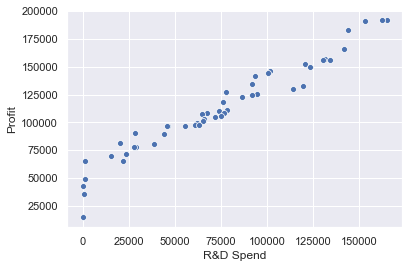

In [3]:
# R&D Spend vs profit checking for outliers
sns.scatterplot(data = dataset, x = 'R&D Spend', y = 'Profit');

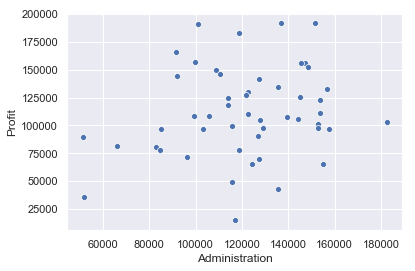

In [4]:
# Administration vs profit checking for outliers
sns.scatterplot(data = dataset, x = 'Administration', y = 'Profit');

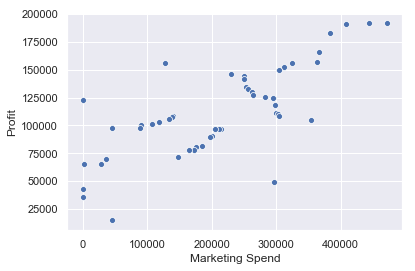

In [5]:
# Marketing Spend vs profit checking for outliers
sns.scatterplot(data = dataset, x = 'Marketing Spend', y = 'Profit');

### Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

For linear regression, no need to go for feature scaling as sklearns library will take care of that for us.

## Fitting algorithm to our training set

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
# Predicting the Test set results
# y-pred will have vector of predictions for dependant variables
y_pred = regressor.predict(X_test)

In [13]:
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [14]:
pd.DataFrame({'y_test' : y_test, 'y_pred': y_pred})

,y_test,y_pred
28,103282.38,103015.201598
11,144259.40,132582.277608
10,146121.95,132447.738452
41,77798.83,71976.098513
2,191050.39,178537.482211
27,105008.31,116161.242302
38,81229.06,67851.692097
31,97483.56,98791.733747
22,110352.25,113969.435330
4,166187.94,167921.065696


In [15]:
#X = dataset.iloc[:, :-1].values
#y = dataset.iloc[:, 4].values